In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
#from sklearn.metrics import mean_absolute_percentage_error


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas

In [3]:
data = pd.read_csv('testconcat.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.721667   3.255194   14.186936    2.770183    1.143114   
1985-03-04    1.687380   3.033250   14.095586    2.754384    1.141212   
1985-03-05    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-06    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-07    1.637751   3.033250   13.586567    2.822849    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-23  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-24  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-28  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-29  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-30  246.679993  93.030212  122.700371  235.031281  147.309998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.687380   3.033250   14.095586    2.754384    1.141212   
1985-03-04    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-05    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-06    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-07    1.619704   3.005508   13.534367    2.775449    1.141212   
...                ...        ...         ...         ...         ...   
2020-12-23  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-24  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-28  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-29  246.679993  93.030212  122.700371  235.031281  147.309998   
2020-12-30         NaN        NaN         NaN         NaN         NaN   

Attributes        High                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.721667   3.292185   14.278297    2.785982    1.154899   
1985-03-04    1.718962   3.273691   14.239152    2.785983    1.153099   
1985-03-05    1.687378   3.125728   14.186946    2.754383    1.170931   
1985-03-06    1.673845   3.107232   14.147776    2.775450    1.167960   
1985-03-07    1.642263   3.088737   13.925905    2.822849    1.153099   
...                ...        ...         ...         ...         ...   
2020-12-23  247.229996  93.449405  123.558897  233.258430  145.600006   
2020-12-24  249.250000  93.379536  123.450351  233.995469  145.110001   
2020-12-28  249.869995  94.477422  124.930568  237.511265  147.600006   
2020-12-29  250.750000  93.589134  123.825342  237.411666  148.770004   
2020-12-30  249.339996  93.658994  123.203648  235.987428  147.990005   

Attributes         Low                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.676832   3.236698   13.991164    2.743850    1.125437   
1985-03-04    1.678356   2.996260   14.030328    2.743851    1.135268   
1985-03-05    1.651285   3.051746   14.056431    2.717518    1.141212   
1985-03-06    1.642262   3.051746   13.860644    2.717519    1.144184   
1985-03-07    1.624216   3.033250   13.573515    2.759651    1.132296   
...                ...        ...         ...         ...         ...   
2020-12-23  244.179993  91.932340  122.108281  229.573308  144.070007   
2020-12-24  244.899994  91.702776  122.572087  230.698779  144.139999   
2020-12-28  247.289993  92.750755  122.818788  234.244453  145.539993   
2020-12-29  247.279999  91.902399  121.614875  231.515469  146.839996   
2020-12-30  246.589996  92.471295  121.999734  233.059245  147.009995   

Attributes        Open                                                 ...  \
Symbol             BDX         GL         IBM         NSC         PEP  ...   
1985-03-01    1.676832   0.000000   14.04337

In [4]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(9033, 80)

In [5]:
stocks_list = data.xs('Close', level=0, axis=1).columns
for i in stocks_list:
    print("stock",i)
    # Cual es el máximo de datos faltantes en un mismo registro?
    print(max(data.xs(i, level=1, axis=1).isnull().sum(axis=1)))
    #Cuantos datos faltantes hay por cada atributo?
    print(data.xs(i, level=1, axis=1).isnull().sum())

stock BDX
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock GL
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           3
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock IBM
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock NSC
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop   

## limpieza

En el primer box realizo una limpieza teniendo todas las acciones para que sea mas facil, ya que estas fechas en todas las acciones estan vacias por lo tanto se eliminan.

En el segundo box se borran estas acciones las cuales tienen muchos datos vacios

En el tercer box se hace uso de ffill 'forward fill' and will propagate last valid observation forward. inplace : If True, fill in place.

In [6]:
#se borran estas fechas las cuales estan vacias en todas las acciones
date_drops = ['2020-12-31','2020-12-30']
data.drop(date_drops, axis=0, errors='ignore', inplace=True)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)

In [7]:
#borrar desde 1980
data.drop(data.index[:data.index.get_loc('1985-03-05')], axis=0, inplace=True)

In [8]:
# missing values in the data are interpolated using forward-fill (‘ffill ()’)method to propagate last valid observation forward.
data = data.fillna(method='bfill')

In [9]:
#se borran estos datos debido a la alta correlacion
attributes_to_erase = ('High','Low','Open','ma20','lower','upper')
for i in attributes_to_erase:
    data=data.drop(i, axis=1, level=0)

## jeff scaler

In [37]:
X = data.drop(['CloseNext'], level=0, axis=1)
y = data['CloseNext']

In [38]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['CloseNext'] = y[stockName].values
    return df

In [39]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
all_data = pd.DataFrame()
for stock in stock_sel:
    df2 = dfM(stock, X) 
    df2.columns = pd.MultiIndex.from_product([df2.columns, [stock]], names=['Attributes', 'Symbol'])
    all_data = pd.concat([all_data, df2], axis=1).sort_index(axis=1)

all_data

Attributes     Close                                           CloseNext  \
Symbol           BDX        GL       IBM       NSC       PEP         BDX   
1985-03-05 -0.827281 -0.839889 -1.073245 -0.796551 -1.079229    1.642262   
1985-03-06 -0.827475 -0.840615 -1.077965 -0.796121 -1.079732    1.637751   
1985-03-07 -0.827539 -0.842794 -1.084072 -0.794829 -1.079816    1.619704   
1985-03-08 -0.827797 -0.843884 -1.085183 -0.795798 -1.079899    1.588121   
1985-03-11 -0.828249 -0.844974 -1.081018 -0.796013 -1.079816    1.606167   
...              ...       ...       ...       ...       ...         ...   
2020-12-22  2.666565  2.634794  1.221644  3.839015  2.945634  244.250000   
2020-12-23  2.642963  2.679876  1.227731  3.892342  2.956622  247.990005   
2020-12-24  2.696462  2.678700  1.244314  3.918191  2.974935  248.149994   
2020-12-28  2.698751  2.695165  1.247043  3.965412  3.027058  248.350006   
2020-12-29  2.701612  2.650867  1.225632  3.910050  3.041427  246.679993   

Attributes                                                   Volume            \
Symbol             GL         IBM         NSC         PEP       BDX        GL   
1985-03-05   3.088737   13.873695    2.759651    1.147157 -0.719720 -0.594723   
1985-03-06   3.033250   13.586567    2.822849    1.144183 -0.242853 -0.508574   
1985-03-07   3.005508   13.534367    2.775449    1.141212  0.423002 -0.960252   
1985-03-08   2.977763   13.730146    2.764918    1.144183 -0.154951 -0.962667   
1985-03-11   3.060992   13.769285    2.764918    1.159043 -0.559299 -0.271866   
...               ...         ...         ...         ...       ...       ...   
2020-12-22  92.720818  122.266174  232.182770  144.410004 -0.218268 -0.511705   
2020-12-23  92.690872  123.045761  233.447678  145.059998 -0.247935 -0.384435   
2020-12-24  93.110062  123.174042  235.758347  146.910004 -0.906511 -0.954825   
2020-12-28  91.982246  122.167496  233.049286  147.419998 -0.625637 -0.633488   
2020-12-29  93.030212  122.700371  235.031281  147.309998 -0.388715 -0.431550   

Attributes                                     bop                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-05 -0.696469 -0.370145  0.178135 -1.156526  2.141280 -0.582557   
1985-03-06 -0.678160  0.101955 -0.369045 -1.572225  2.916646 -1.541034   
1985-03-07 -0.012646 -0.629145 -0.024218 -0.484997  2.859899 -1.260778   
1985-03-08 -0.043771  1.017961 -0.735208 -1.231152  4.368079 -0.890839   
1985-03-11 -0.658936 -0.507841 -1.177081 -1.380377  1.585294  1.475225   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.628705 -0.603063 -0.777690 -0.869343 -0.261843  0.278933   
2020-12-23 -1.004532 -0.309457 -0.780978 -1.698887 -0.212034 -0.002479   
2020-12-24 -1.218010 -0.911313 -1.454648  1.234673 -0.256042 -0.671920   
2020-12-28 -0.793687 -0.618435 -0.838946 -0.488501 -0.246440 -0.269665   
2020-12-29 -0.823026 -0.512941 -0.573883 -0.584364 -0.293890 -1.307564   

Attributes                         ema20                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-05 -0.299008  1.250722 -0.826184 -0.835538 -1.071015 -0.798362   
1985-03-06  0.633997 -1.535893 -0.826280 -0.836039 -1.071617 -0.798374   
1985-03-07  1.806196  0.179964 -0.826373 -0.836700 -1.072744 -0.798261   
1985-03-08 -1.647641 -0.863304 -0.826482 -0.837403 -1.073870 -0.798252   
1985-03-11 -0.496361 -0.735243 -0.826624 -0.838143 -1.074491 -0.798264   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.420046 -0.827889  2.627110  2.703061  1.226635  3.942003   
2020-12-23  0.561569 -0.195053  2.629995  2.702391  1.227165  3.941177   
2020-12-24  0.615266  0.361117  2.637721  2.701672  1.229226  3.942915   
2020-12-28  0.239337  0.959637  2.644931  2.702597  1.231351  3.949026   
2020-12-29 -0.950645 -0.353455  2.651727  2.699195  1.231231  3.949234   

Attributes              ema200 

## algunos analisis individuales

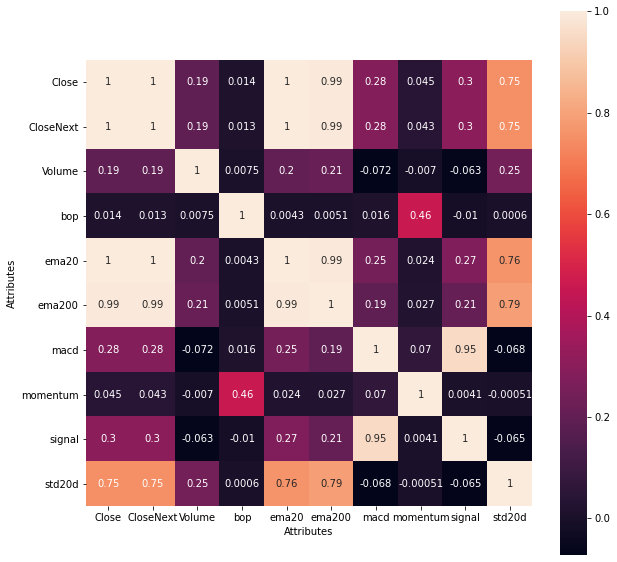

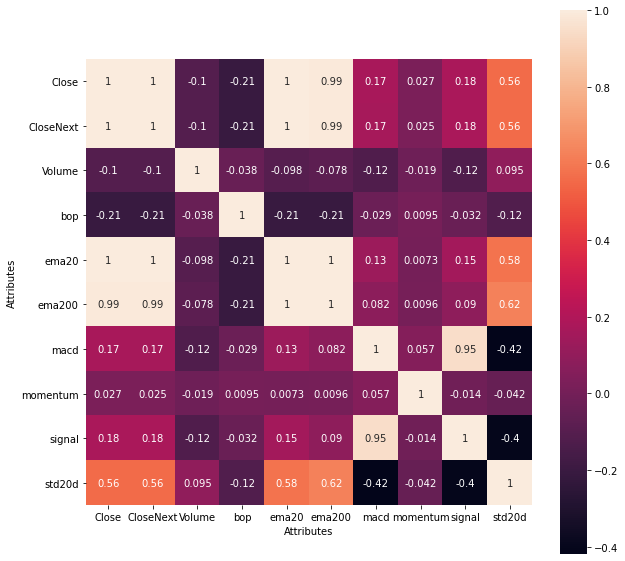

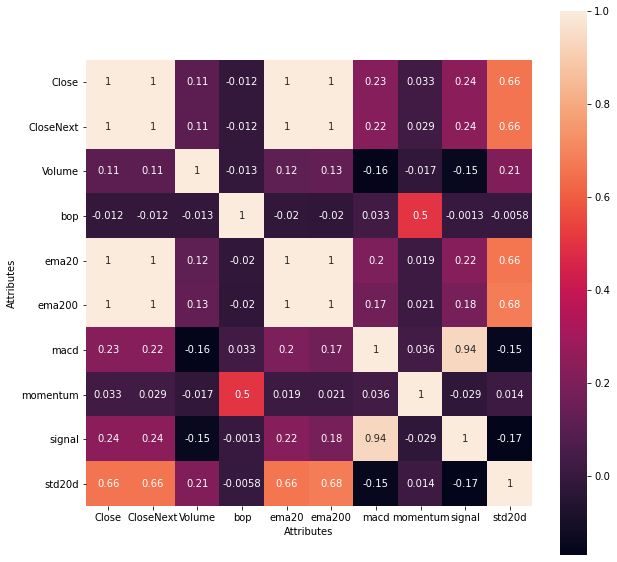

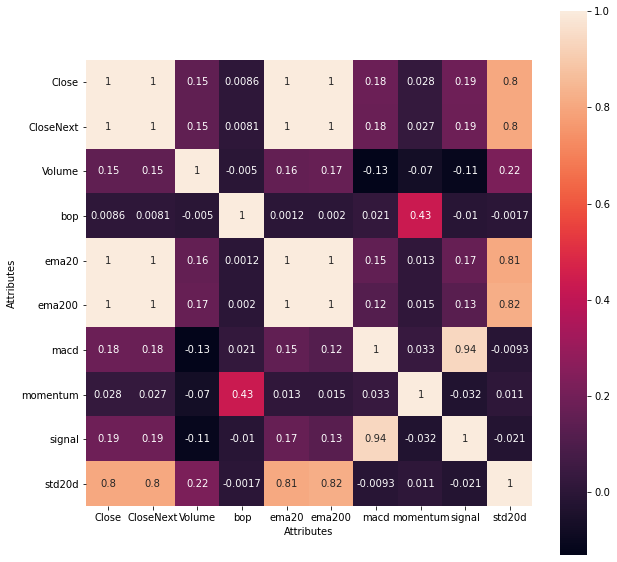

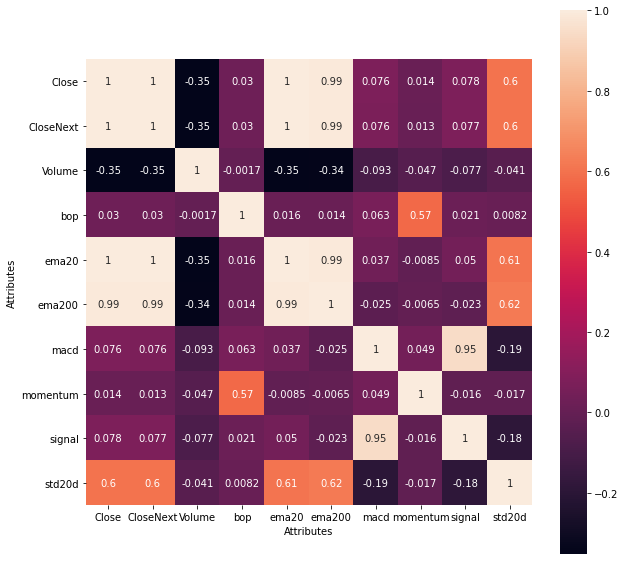

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('NSC', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('GL', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('PEP', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('BDX', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('IBM', level=1, axis=1).corr(), square=True, annot=True, ax=ax)

## Sacamos el dataframe de la accion NSC

In [11]:
dataNSC = data.xs('NSC', level=1, axis=1)
dataNSC

Attributes,Close,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
1985-03-05,2.738583,2.759651,1125900,-0.142862,2.765812,2.769713,-0.003494,-0.015801,-0.000900,0.045925
1985-03-06,2.759651,2.822849,1773900,0.363643,2.765225,2.769613,-0.003523,0.021068,-0.001425,0.045925
1985-03-07,2.822849,2.775449,770400,1.000000,2.770713,2.770142,0.001535,0.063198,-0.000833,0.045925
1985-03-08,2.775449,2.764918,3031200,-0.875001,2.771164,2.770195,0.001700,-0.047400,-0.000326,0.045925
1985-03-11,2.764918,2.764918,936900,-0.250000,2.770569,2.770143,0.000969,-0.010531,-0.000067,0.045925
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,229.573318,232.182770,806200,0.247494,232.603049,204.485850,-0.342254,0.358551,1.149920,4.805877
2020-12-23,232.182770,233.447678,1209200,0.324324,232.563022,204.761441,-0.292470,2.609451,0.861442,4.598120
2020-12-24,233.447678,235.758347,383100,0.353474,232.647275,205.046876,-0.149229,1.264908,0.659308,4.392238
2020-12-28,235.758347,233.049286,785100,0.149392,232.943568,205.352463,0.149025,2.310669,0.557251,4.048430


In [13]:
r2Score = r2_score(dataNSC['CloseNext'],dataNSC['Close'])
rmse = mean_squared_error(dataNSC['CloseNext'],dataNSC['Close'], squared=False)
mae=median_absolute_error(dataNSC['CloseNext'],dataNSC['Close'])
print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)

r2Score: 0.9994057825090196
rmse: 1.193820747251723
mae: 0.19431209564209073


'NSC'

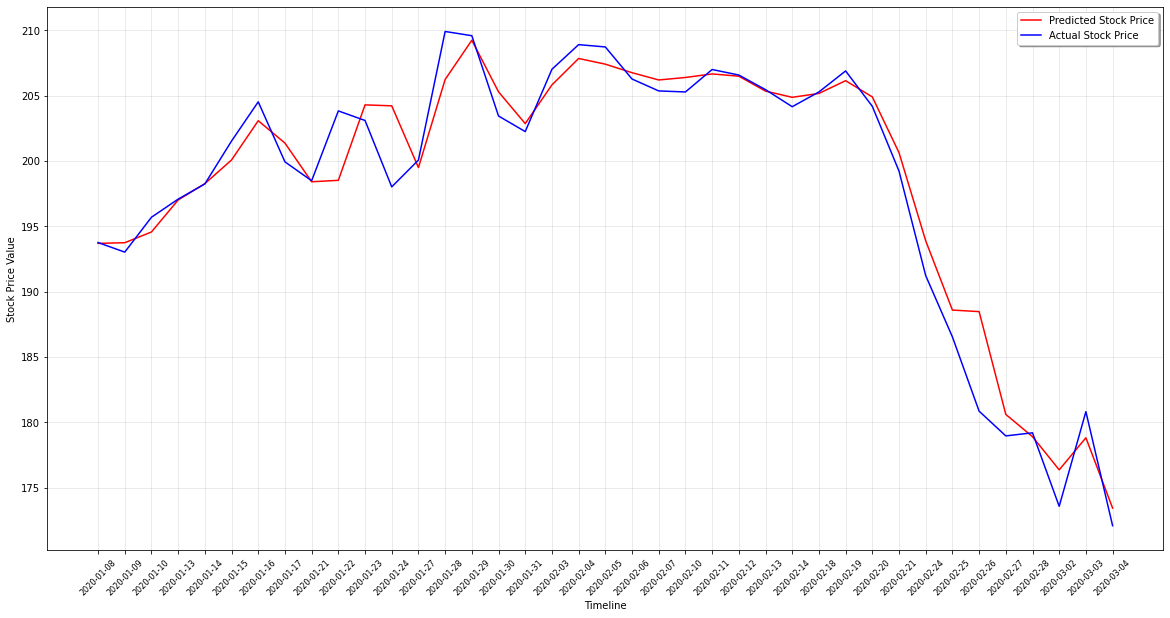

RMSE 0.663694324960298
R2-score test: 0.9994708437525959
R2-score_adj test: 0.9994681920787503
RMSE test: 1.147463909636389
MAE test: 0.22286367416381836


'GL'

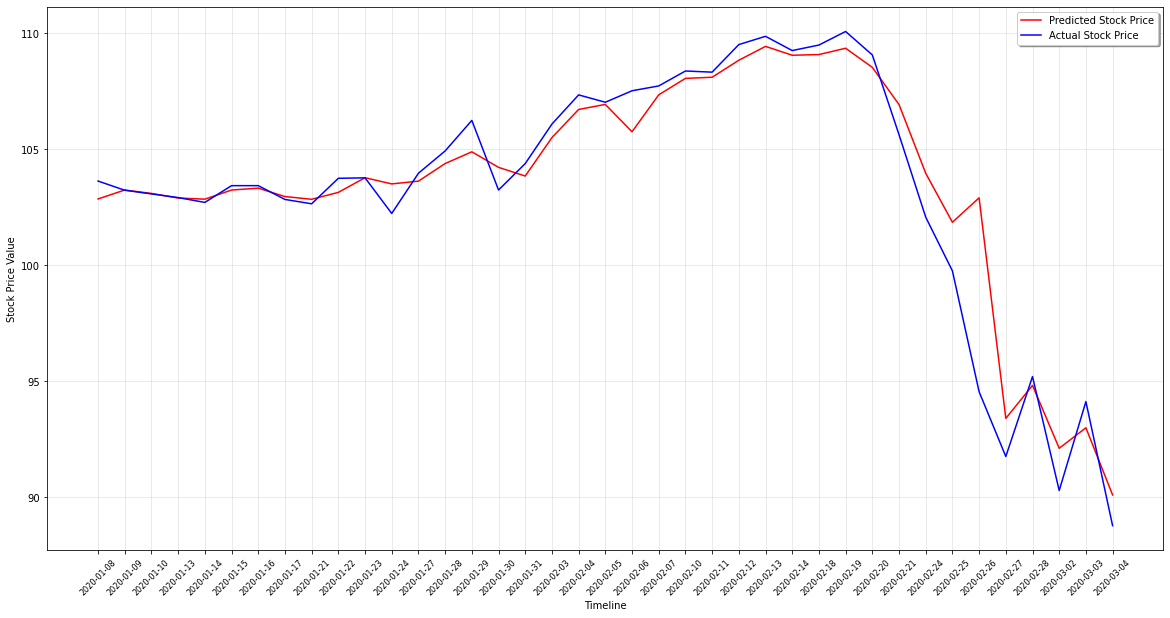

RMSE 0.3160985286092574
R2-score test: 0.9995372278119466
R2-score_adj test: 0.9995349087976413
RMSE test: 0.55111328006419
MAE test: 0.11608347296714783


'PEP'

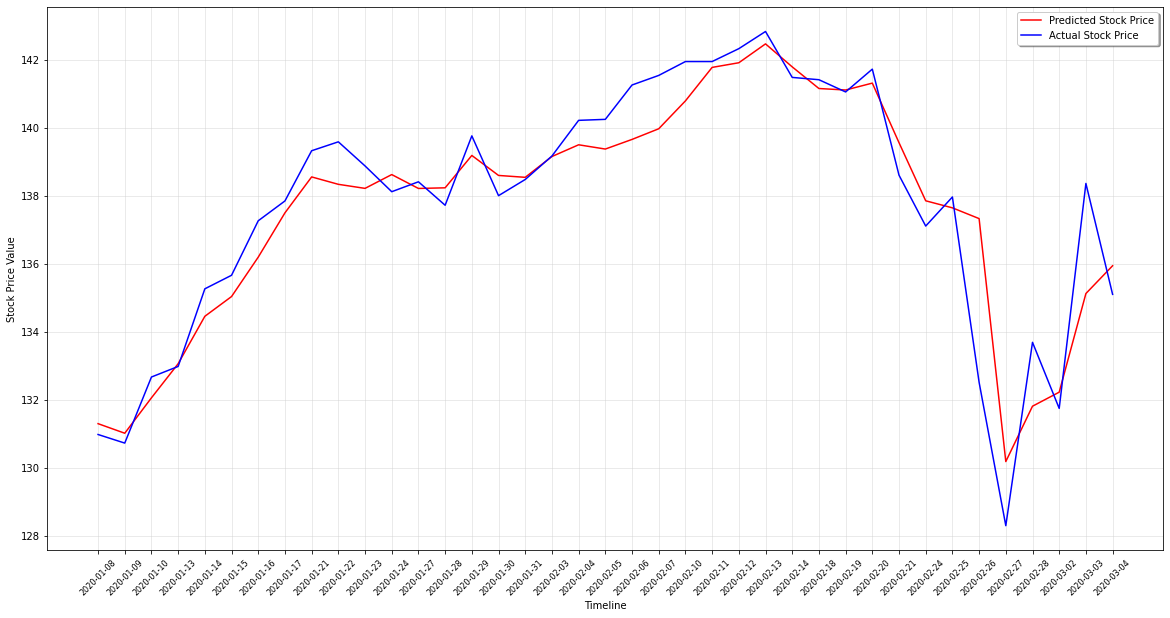

RMSE 0.368251581283275
R2-score test: 0.9996811893469476
R2-score_adj test: 0.9996795917434523
RMSE test: 0.6387570313240476
MAE test: 0.19611084461212158


'BDX'

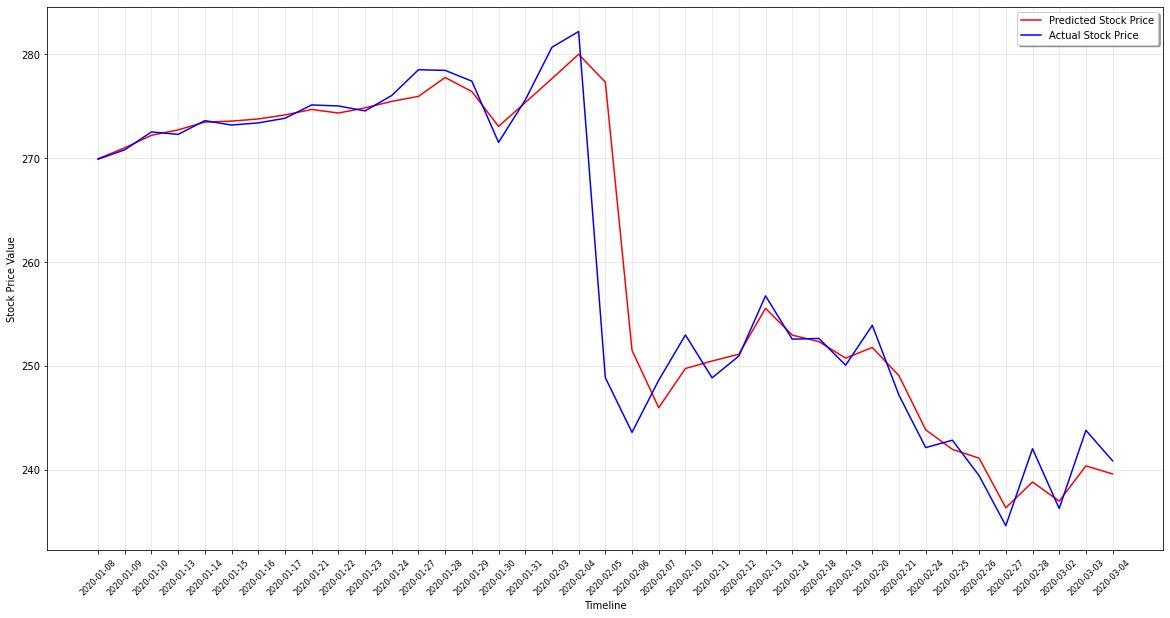

RMSE 0.7892325570620555
R2-score test: 0.9995904201211371
R2-score_adj test: 0.9995883676607196
RMSE test: 1.4254173618779014
MAE test: 0.2213809370994575


'IBM'

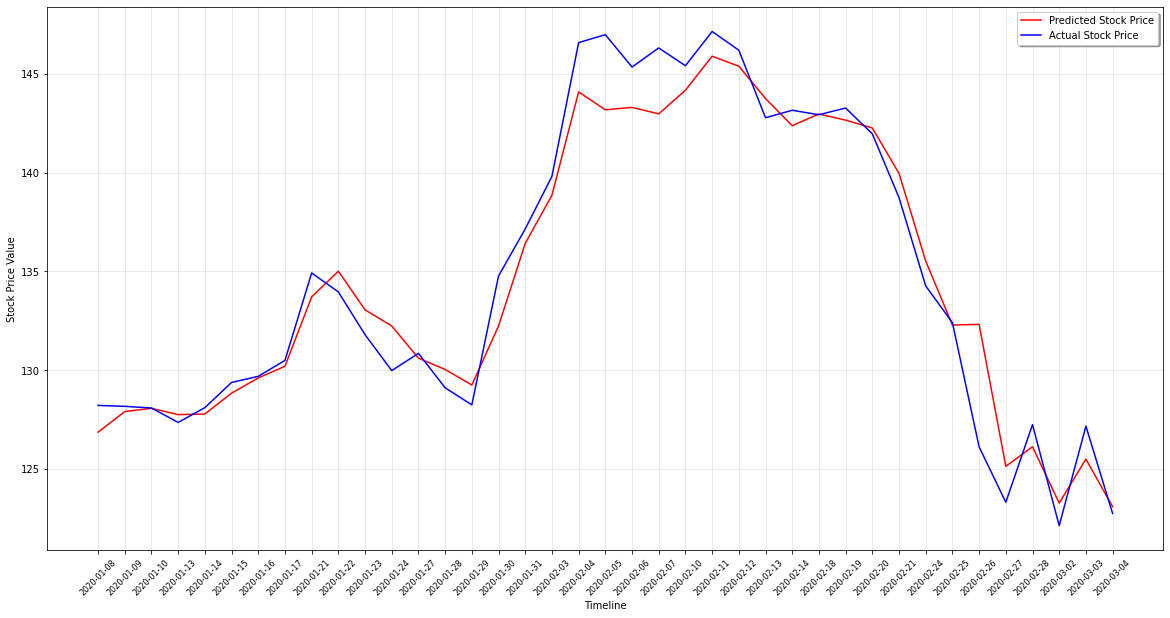

RMSE 0.6816732183770451
R2-score test: 0.9993511420711766
R2-score_adj test: 0.9993478905559431
RMSE test: 1.2033904326379927
MAE test: 0.36156735420227015


In [40]:
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    display(stock)
    df = all_data.xs(stock, level=1, axis=1)
    df.sort_index(ascending=True, inplace=True)

    X_scaled = np.array(df.drop(['CloseNext'], axis=1))
    y_scaled = np.array(df['CloseNext'])
    # Split the df into 80% training and 20% testing
     
    Params = {'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True}
  
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=4)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
    clf.fit(X_train,y_train)
    PRED = clf.predict(X_scaled)
   
    #Visualization
    #params = str(Params)
    # Chage on attributes and no change on PricePerShare
    # Reduced attributes v2
    # TSCO

    # Plot parameters
    START_DATE_FOR_PLOTTING = '2020-01-08'
    ENDING_DATE_FOR_PLOTTING = '2020-03-05'
    START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
    ENDING_INDEX = df.index.get_loc(ENDING_DATE_FOR_PLOTTING)
    fig1,ax1 = plt.subplots(figsize=(20,10))


    plt.plot(df.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
    plt.plot(df.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

    #plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

    plt.grid(which='major', color='#cccccc', alpha=0.5)

    plt.legend(shadow=True)
    #plt.title(params, family='DejaVu Sans', fontsize=12)
    plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
    plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.show()
    
    print("RMSE",mean_squared_error(y_scaled, PRED, squared=False))
    print("R2-score test:",r2_score(y_test, clf.predict(X_test)))
    print("R2-score_adj test:",1-(1-r2_score(y_test, clf.predict(X_test)))*(len(y_test)-1)/(len(y_test)-9-1))
    print("RMSE test:",mean_squared_error(y_test, clf.predict(X_test), squared=False))
    print("MAE test:",median_absolute_error(y_test, clf.predict(X_test)))

## Trabajo con la accion NSC con los parametros sin standarizacion

1- se corre un grid search con distintos parametros para el modelo usando random forest

In [16]:
# Realizamos el holdout
HOLDOUT = 5
for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(dataNSC.drop(['CloseNext'], axis=1), dataNSC['CloseNext'], test_size=0.3)
    rf_clf = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
    parameter_space = {
        'n_estimators': [80, 100, 200],
        'min_samples_leaf': [1, 3, 6],
        'max_features': ['auto', 0.5],
        'oob_score': [False, True],
        'max_leaf_nodes' :[None,10],
        'max_samples':[None,40]
    }
    clf = GridSearchCV(rf_clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    pred = clf.predict(X_test)
    r2Score = r2_score(y_test,pred)
    p=9
    n=len(y_test)
    Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
    rmse = mean_squared_error(y_test,pred, squared=False)
    mae=median_absolute_error(y_test,pred)
    evs=explained_variance_score(y_test, pred)

    clf_params = clf.best_params_
    print(clf_params)
    print(clf.best_score_)
    print("Adj_r2Score:",Adj_r2)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("random_seeds",i)

{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True}
0.9993588482868514
Adj_r2Score: 0.999384633148439
rmse: 1.2138568195243238
mae: 0.20404078960418737
evs: 0.999386686060833
random_seeds 0
{'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 3, 'n_estimators': 200, 'oob_score': True}
0.999368436428676
Adj_r2Score: 0.9992633573435808
rmse: 1.3081004957494962
mae: 0.22773571936255266
evs: 0.9992665353896831
random_seeds 1
{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': False}
0.999332931919131
Adj_r2Score: 0.9994163548714569
rmse: 1.1828883908045973
mae: 0.2023547744750971
evs: 0.9994191516450833
random_seeds 2
{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True}
0.9993340488948982
Adj_r2Score: 0.9992998277598432
rmse: 1.3355

## normal, pero sin el close

In [25]:
dataNSC = data.xs('NSC', level=1, axis=1)
dataNSC=dataNSC.drop('Close', axis=1)
dataNSC

Attributes,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
1985-03-05,2.759651,1125900,-0.142862,2.765812,2.769713,-0.003494,-0.015801,-0.000900,0.045925
1985-03-06,2.822849,1773900,0.363643,2.765225,2.769613,-0.003523,0.021068,-0.001425,0.045925
1985-03-07,2.775449,770400,1.000000,2.770713,2.770142,0.001535,0.063198,-0.000833,0.045925
1985-03-08,2.764918,3031200,-0.875001,2.771164,2.770195,0.001700,-0.047400,-0.000326,0.045925
1985-03-11,2.764918,936900,-0.250000,2.770569,2.770143,0.000969,-0.010531,-0.000067,0.045925
...,...,...,...,...,...,...,...,...,...
2020-12-22,232.182770,806200,0.247494,232.603049,204.485850,-0.342254,0.358551,1.149920,4.805877
2020-12-23,233.447678,1209200,0.324324,232.563022,204.761441,-0.292470,2.609451,0.861442,4.598120
2020-12-24,235.758347,383100,0.353474,232.647275,205.046876,-0.149229,1.264908,0.659308,4.392238
2020-12-28,233.049286,785100,0.149392,232.943568,205.352463,0.149025,2.310669,0.557251,4.048430


In [21]:
# Realizamos el holdout
HOLDOUT = 5
for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(dataNSC.drop(['CloseNext'], axis=1), dataNSC['CloseNext'], test_size=0.3)
    rf_clf = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
    parameter_space = {
        'n_estimators': [80, 100, 200],
        'min_samples_leaf': [1, 3, 6],
        'max_features': ['auto', 0.5],
        'oob_score': [False, True],
        'max_leaf_nodes' :[None,10],
        'max_samples':[None,40]
    }
    clf = GridSearchCV(rf_clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    pred = clf.predict(X_test)
    r2Score = r2_score(y_test,pred)
    p=8
    n=len(y_test)
    Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
    rmse = mean_squared_error(y_test,pred, squared=False)
    mae=median_absolute_error(y_test,pred)
    evs=explained_variance_score(y_test, pred)

    clf_params = clf.best_params_
    print(clf_params)
    print(clf.best_score_)
    print("r2Score:",r2Score)
    print("Adj_r2Score:",Adj_r2)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("random_seeds",i)

{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': True}
0.9988743409592183
r2Score: 0.9987418137705846
Adj_r2Score: 0.9987380858113863
rmse: 1.7488992854415997
mae: 0.2483611297607382
evs: 0.9987418449035269
random_seeds 0
{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
0.9988610010547271
r2Score: 0.9993439688076678
Adj_r2Score: 0.9993420250115425
rmse: 1.2406379784500174
mae: 0.26512607574462876
evs: 0.9993440684342225
random_seeds 1
{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': False}
0.9990221401778129
r2Score: 0.9991519269551711
Adj_r2Score: 0.9991494141461493
rmse: 1.4470622607796766
mae: 0.23842009544372367
evs: 0.9991522805759251
random_seeds 2
{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 

## Prueba con graficacion

In [26]:
dataNSC_train = dataNSC.drop(dataNSC.index[dataNSC.index.get_loc('2018-01-03'):], axis=0)
dataNSC_test = dataNSC.drop(dataNSC.index[:dataNSC.index.get_loc('2018-01-03')], axis=0)
dataNSC_train

Attributes,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
1985-03-05,2.759651,1125900,-0.142862,2.765812,2.769713,-0.003494,-0.015801,-0.000900,0.045925
1985-03-06,2.822849,1773900,0.363643,2.765225,2.769613,-0.003523,0.021068,-0.001425,0.045925
1985-03-07,2.775449,770400,1.000000,2.770713,2.770142,0.001535,0.063198,-0.000833,0.045925
1985-03-08,2.764918,3031200,-0.875001,2.771164,2.770195,0.001700,-0.047400,-0.000326,0.045925
1985-03-11,2.764918,936900,-0.250000,2.770569,2.770143,0.000969,-0.010531,-0.000067,0.045925
...,...,...,...,...,...,...,...,...,...
2017-12-26,137.116394,465800,0.085114,131.991266,116.142292,3.131304,0.075180,3.009363,3.287846
2017-12-27,136.552536,919500,0.453201,132.479374,116.350989,3.155490,1.231064,3.038588,2.508353
2017-12-28,136.167236,569900,-0.353845,132.867294,116.552000,3.093499,-0.563858,3.049570,2.360436
2017-12-29,138.103088,700800,-0.529917,133.181574,116.747176,2.978940,-0.385300,3.035444,2.317481


In [32]:
X_train, X_test, y_train, y_test = train_test_split(dataNSC_train.drop(['CloseNext'], axis=1), dataNSC_train['CloseNext'], test_size=0.3)

clf = RandomForestRegressor(max_features= 0.5, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1, n_estimators=100, oob_score= True)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
r2Score = r2_score(y_test,pred)
p=8
n=len(y_test)
Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)


print("r2Score:",r2Score)
print("Adj_r2Score:",Adj_r2)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)
print("random_seeds",i)

r2Score: 0.9991750690959188
Adj_r2Score: 0.9991724026525924
rmse: 0.8343597823970746
mae: 0.2200352287292473
evs: 0.9991767565387545
random_seeds 4


In [40]:
print(dataNSC_test['CloseNext'])

2018-01-03    138.497772
2018-01-04    141.213623
2018-01-05    143.374985
2018-01-08    144.342926
2018-01-09    142.472839
                 ...    
2020-12-22    232.182770
2020-12-23    233.447678
2020-12-24    235.758347
2020-12-28    233.049286
2020-12-29    235.031281
Name: CloseNext, Length: 753, dtype: float64


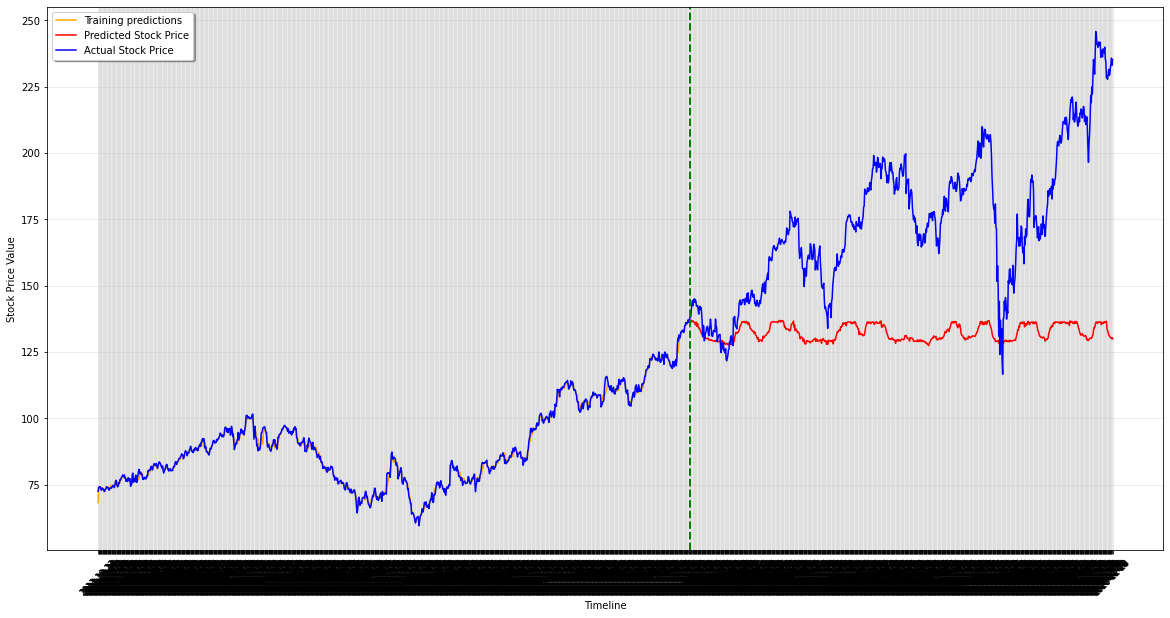

In [36]:
# Chage on attributes and no change on PricePerShare
# Reduced attributes
#dt_train = np.array(dataNSC_train.drop(['CloseNext'], axis=1))
PRED_TRAIN = clf.predict(dataNSC_train.drop(['CloseNext'], axis=1))
PRED_FUTURE = clf.predict(dataNSC_test.drop(['CloseNext'], axis=1))
# Plot parameters
START_DATE_FOR_PLOTTING = '2013-10-22'
START_INDEX = dataNSC_train.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(dataNSC_train.index[START_INDEX:], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(dataNSC_test.index[:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(dataNSC.index[START_INDEX:], dataNSC['CloseNext'][START_INDEX:].values, color='b', label='Actual Stock Price')

plt.axvline(x = dataNSC_train.index[-1], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

## Trabajo con la accion NSC normalizando multiplicando x10,000

In [23]:
dataNSCXTEN = dataNSC
dataNSCXTEN['CloseNext']=dataNSCXTEN['CloseNext']*10000
dataNSCXTEN['Close'] = dataNSCXTEN['Close']*10000
dataNSCXTEN

<ipython-input-23-4e4026151916>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNSCXTEN['CloseNext']=dataNSCXTEN['CloseNext']*10000
<ipython-input-23-4e4026151916>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNSCXTEN['Close'] = dataNSCXTEN['Close']*10000


Attributes,Close,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
1985-03-05,2.738583e+04,2.759651e+04,1125900,-0.142862,2.765812,2.769713,-0.003494,-0.015801,-0.000900,0.045925
1985-03-06,2.759651e+04,2.822849e+04,1773900,0.363643,2.765225,2.769613,-0.003523,0.021068,-0.001425,0.045925
1985-03-07,2.822849e+04,2.775449e+04,770400,1.000000,2.770713,2.770142,0.001535,0.063198,-0.000833,0.045925
1985-03-08,2.775449e+04,2.764918e+04,3031200,-0.875001,2.771164,2.770195,0.001700,-0.047400,-0.000326,0.045925
1985-03-11,2.764918e+04,2.764918e+04,936900,-0.250000,2.770569,2.770143,0.000969,-0.010531,-0.000067,0.045925
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,2.295733e+06,2.321828e+06,806200,0.247494,232.603049,204.485850,-0.342254,0.358551,1.149920,4.805877
2020-12-23,2.321828e+06,2.334477e+06,1209200,0.324324,232.563022,204.761441,-0.292470,2.609451,0.861442,4.598120
2020-12-24,2.334477e+06,2.357583e+06,383100,0.353474,232.647275,205.046876,-0.149229,1.264908,0.659308,4.392238
2020-12-28,2.357583e+06,2.330493e+06,785100,0.149392,232.943568,205.352463,0.149025,2.310669,0.557251,4.048430


In [43]:
# Realizamos el holdout
HOLDOUT = 5
for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(dataNSCXTEN.drop(['CloseNext'], axis=1), dataNSCXTEN['CloseNext'], test_size=0.3)
    rf_clf = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
    parameter_space = {
        'n_estimators': [80, 100, 200],
        'min_samples_leaf': [1, 3, 6],
        'max_features': ['auto', 0.5],
        'oob_score': [False, True],
        'max_leaf_nodes' :[None,10],
        'max_samples':[None,40]
    }
    clf = GridSearchCV(rf_clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    pred = clf.predict(X_test)
    r2Score = r2_score(y_test,pred)
    p=8
    n=len(y_test)
    Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
    rmse = mean_squared_error(y_test,pred, squared=False)
    mae=median_absolute_error(y_test,pred)
    evs=explained_variance_score(y_test, pred)

    clf_params = clf.best_params_
    print(clf_params)
    print(clf.best_score_)
    print("r2Score:",r2Score)
    print("Adj_r2Score:",Adj_r2)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("random_seeds",i)

{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': True}
0.9994291533971813
r2Score: 0.9991748977078961
Adj_r2Score: 0.9991724529603639
rmse: 13966.87729255792
mae: 1978.5020589828637
evs: 0.9991749098417988
random_seeds 0
{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': False}
0.9993323109143825
r2Score: 0.9993581267647161
Adj_r2Score: 0.9993562249180931
rmse: 12623.13295707643
mae: 2102.6870727539062
evs: 0.9993584301336682
random_seeds 1
{'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 6, 'n_estimators': 80, 'oob_score': False}
0.9993319496561112
r2Score: 0.9993070317317349
Adj_r2Score: 0.9993049784924215
rmse: 12953.504921598624
mae: 2282.6384685846715
evs: 0.999307142953929
random_seeds 2
{'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 3, 'n_estimators':

In [44]:
dataNSCXTEN_train = dataNSCXTEN.drop(dataNSCXTEN.index[dataNSCXTEN.index.get_loc('2018-01-03'):], axis=0)
dataNSCXTEN_test = dataNSCXTEN.drop(dataNSCXTEN.index[:dataNSCXTEN.index.get_loc('2018-01-03')], axis=0)
dataNSCXTEN_train

Attributes,Close,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
1985-03-05,2.738583e+04,2.759651e+04,1125900,-0.142862,2.765812,2.769713,-0.003494,-0.015801,-0.000900,0.045925
1985-03-06,2.759651e+04,2.822849e+04,1773900,0.363643,2.765225,2.769613,-0.003523,0.021068,-0.001425,0.045925
1985-03-07,2.822849e+04,2.775449e+04,770400,1.000000,2.770713,2.770142,0.001535,0.063198,-0.000833,0.045925
1985-03-08,2.775449e+04,2.764918e+04,3031200,-0.875001,2.771164,2.770195,0.001700,-0.047400,-0.000326,0.045925
1985-03-11,2.764918e+04,2.764918e+04,936900,-0.250000,2.770569,2.770143,0.000969,-0.010531,-0.000067,0.045925
...,...,...,...,...,...,...,...,...,...,...
2017-12-26,1.358853e+06,1.371164e+06,465800,0.085114,131.991266,116.142292,3.131304,0.075180,3.009363,3.287846
2017-12-27,1.371164e+06,1.365525e+06,919500,0.453201,132.479374,116.350989,3.155490,1.231064,3.038588,2.508353
2017-12-28,1.365525e+06,1.361672e+06,569900,-0.353845,132.867294,116.552000,3.093499,-0.563858,3.049570,2.360436
2017-12-29,1.361672e+06,1.381031e+06,700800,-0.529917,133.181574,116.747176,2.978940,-0.385300,3.035444,2.317481


In [45]:
X_train, X_test, y_train, y_test = train_test_split(dataNSCXTEN_train.drop(['CloseNext'], axis=1), dataNSCXTEN_train['CloseNext'], test_size=0.3)

clf = RandomForestRegressor(max_features= 0.5, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1, n_estimators=100, oob_score= False)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
r2Score = r2_score(y_test,pred)
p=8
n=len(y_test)
Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)


print("r2Score:",r2Score)
print("Adj_r2Score:",Adj_r2)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)
print("random_seeds",i)

r2Score: 0.9993505236297839
Adj_r2Score: 0.9993484243122236
rmse: 7147.810128754033
mae: 1842.6219940185547
evs: 0.9993505557408753
random_seeds 4


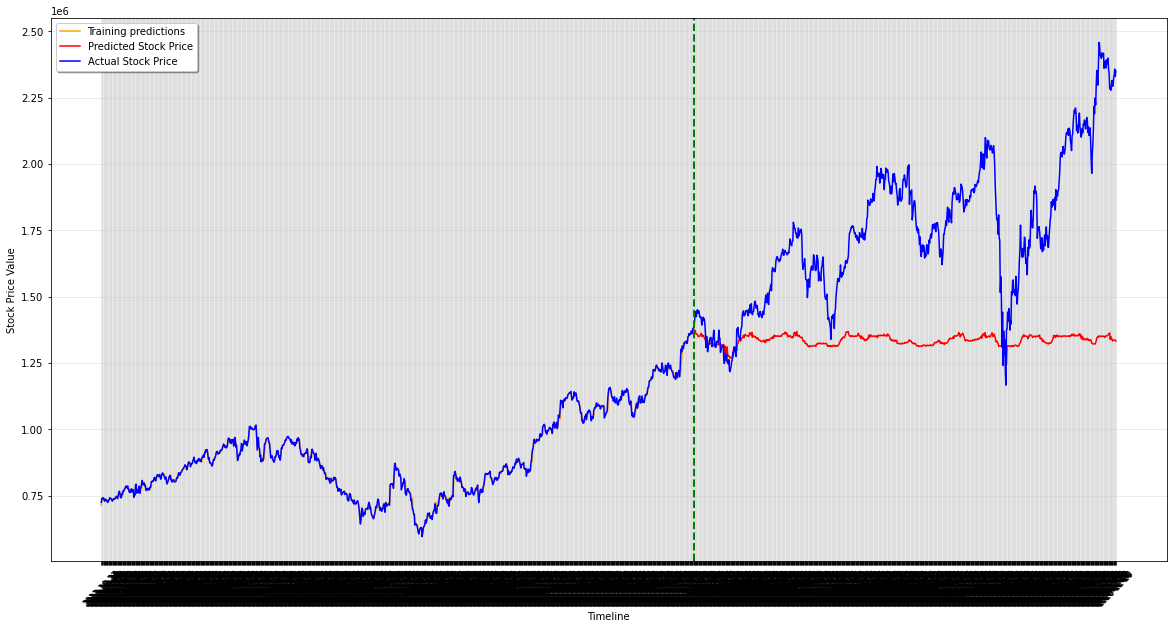

In [46]:
# Chage on attributes and no change on PricePerShare
# Reduced attributes
#dt_train = np.array(dataNSC_train.drop(['CloseNext'], axis=1))
PRED_TRAIN = clf.predict(dataNSCXTEN_train.drop(['CloseNext'], axis=1))
PRED_FUTURE = clf.predict(dataNSCXTEN_test.drop(['CloseNext'], axis=1))
# Plot parameters
START_DATE_FOR_PLOTTING = '2013-10-22'
START_INDEX = dataNSCXTEN_train.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(dataNSCXTEN_train.index[START_INDEX:], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(dataNSCXTEN_test.index[:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(dataNSCXTEN.index[START_INDEX:], dataNSCXTEN['CloseNext'][START_INDEX:].values, color='b', label='Actual Stock Price')

plt.axvline(x = dataNSCXTEN_train.index[-1], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

## escalacion jeff

## Trabajo con la accion NSC usando standarizacion

1- se le aplica el standardScaler

2- se corre un grid search con distintos parametros para el modelo usando random forest

In [14]:
X2 = np.array(dataNSC.drop(['CloseNext'], axis=1))
sc = StandardScaler()
X_scaledNSC = sc.fit_transform(X2)
sc_predict = StandardScaler()
y_scaledNSC = sc_predict.fit_transform(dataNSC.values[:, dataNSC.columns.get_loc('CloseNext'):dataNSC.columns.get_loc('CloseNext')+1])

In [ ]:
# Realizamos el holdout
HOLDOUT = 5
for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(X_scaledNSC, y_scaledNSC, test_size=0.3)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    rf_clf = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
    parameter_space = {
        'n_estimators': [80, 100, 150],
        'min_samples_leaf': [1, 3],
        'max_features': ['auto', 0.5],
        'oob_score': [True],
        'max_leaf_nodes' :[None],
        'max_samples':[None,100]
    }
    clf = GridSearchCV(rf_clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    pred = clf.predict(X_test)
    r2Score = r2_score(y_test,pred)
    rmse = mean_squared_error(y_test,pred, squared=False)
    mae=median_absolute_error(y_test,pred)
    evs=explained_variance_score(y_test, pred)

    clf_params = clf.best_params_
    print(clf_params)
    print(clf.best_score_)
    print("r2Score:",r2Score)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("random_seeds",i)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaledNSC, y_scaledNSC, test_size=0.3, random_state=5)
y_train = y_train.ravel()
y_test = y_test.ravel()
clf = RandomForestRegressor(max_features= 0.5, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1,n_estimators=100,  oob_score= True)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
r2Score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)
p=9
n=len(y_test)
Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
print("adjustr2Score:",Adj_r2)
print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)
print("random_seeds",i)

adjustr2Score: 0.9994013100416791
r2Score: 0.9994032997793545
rmse: 0.024913995739131896
mae: 0.00437166283423529
evs: 0.9994045940519013
random_seeds upper


## Se quiere separar un conjunto para pruebas y uno para test manualmente

In [16]:
dataNSC_train = dataNSC.drop(dataNSC.index[dataNSC.index.get_loc('2018-01-03'):], axis=0)
dataNSC_test = dataNSC.drop(dataNSC.index[:dataNSC.index.get_loc('2018-01-03')], axis=0)
dataNSC_train

Attributes,Close,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
1985-03-05,2.738583,2.759651,1125900,-0.142862,2.765812,2.769713,-0.003494,-0.015801,-0.000900,0.045925
1985-03-06,2.759651,2.822849,1773900,0.363643,2.765225,2.769613,-0.003523,0.021068,-0.001425,0.045925
1985-03-07,2.822849,2.775449,770400,1.000000,2.770713,2.770142,0.001535,0.063198,-0.000833,0.045925
1985-03-08,2.775449,2.764918,3031200,-0.875001,2.771164,2.770195,0.001700,-0.047400,-0.000326,0.045925
1985-03-11,2.764918,2.764918,936900,-0.250000,2.770569,2.770143,0.000969,-0.010531,-0.000067,0.045925
...,...,...,...,...,...,...,...,...,...,...
2017-12-26,135.885330,137.116394,465800,0.085114,131.991266,116.142292,3.131304,0.075180,3.009363,3.287846
2017-12-27,137.116394,136.552536,919500,0.453201,132.479374,116.350989,3.155490,1.231064,3.038588,2.508353
2017-12-28,136.552536,136.167236,569900,-0.353845,132.867294,116.552000,3.093499,-0.563858,3.049570,2.360436
2017-12-29,136.167236,138.103088,700800,-0.529917,133.181574,116.747176,2.978940,-0.385300,3.035444,2.317481


## Estandarizamos los dos dataframes

In [17]:
X = np.array(dataNSC_train.drop(['CloseNext'], axis=1))
sc = StandardScaler()
X_scaled_train = sc.fit_transform(X)
sc_predict = StandardScaler()
y_scaled_train = sc_predict.fit_transform(dataNSC_train.values[:, dataNSC_train.columns.get_loc('CloseNext'):dataNSC_train.columns.get_loc('CloseNext')+1])

In [18]:
X = np.array(dataNSC_test.drop(['CloseNext'], axis=1))
sc = StandardScaler()
X_scaled_test = sc.fit_transform(X)
sc_predict = StandardScaler()
y_scaled_test = sc_predict.fit_transform(dataNSC_test.values[:, dataNSC_test.columns.get_loc('CloseNext'):dataNSC_test.columns.get_loc('CloseNext')+1])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y_scaled_train, shuffle=True, test_size=0.2, random_state=15)
y_train = y_train.ravel()
y_test = y_test.ravel()
clf2 = RandomForestRegressor(max_features= 0.5, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1,n_estimators=100,  oob_score= True)
clf2.fit(X_train,y_train)
# Se hace la prediccion sobre los datos de prueba
pred = clf2.predict(X_test)
r2Score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
#best possible value = 1
print("evs:",evs)
print("random_seeds",i)



r2Score: 0.9994049434145809
rmse: 0.023646373787773425
mae: 0.006288216661231097
evs: 0.999405127255056
random_seeds upper


In [20]:
pred = clf2.predict(X_scaled_test)
r2Score = r2_score(y_scaled_test,pred)
rmse = mean_squared_error(y_scaled_test,pred, squared=False)
mae=median_absolute_error(y_scaled_test,pred)
evs=explained_variance_score(y_scaled_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)

r2Score: 0.9139486259886307
rmse: 0.2933451448573325
mae: 0.11714127498590066
evs: 0.9223564558532088


## Graficaremos la prediccion usando un conjunto de entrenamiento y otro de pruebas

In [21]:
dataNSC_test

Attributes,Close,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
2018-01-03,138.112518,138.497772,1172500,0.066667,134.075264,117.170149,3.000192,0.009430,3.024269,2.338508
2018-01-04,138.497772,141.213623,1545100,-0.208329,134.496455,117.382364,2.989312,0.385254,3.017278,2.304824
2018-01-05,141.213623,143.374985,1573100,0.536657,135.136185,117.619491,3.163371,2.715851,3.046496,2.460380
2018-01-08,143.374985,144.342926,1374100,0.901760,135.920833,117.875765,3.436108,2.161362,3.124419,2.939903
2018-01-09,144.342926,142.472839,1304900,0.333336,136.722937,118.139120,3.687848,0.967941,3.237105,3.357923
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,229.573318,232.182770,806200,0.247494,232.603049,204.485850,-0.342254,0.358551,1.149920,4.805877
2020-12-23,232.182770,233.447678,1209200,0.324324,232.563022,204.761441,-0.292470,2.609451,0.861442,4.598120
2020-12-24,233.447678,235.758347,383100,0.353474,232.647275,205.046876,-0.149229,1.264908,0.659308,4.392238
2020-12-28,235.758347,233.049286,785100,0.149392,232.943568,205.352463,0.149025,2.310669,0.557251,4.048430


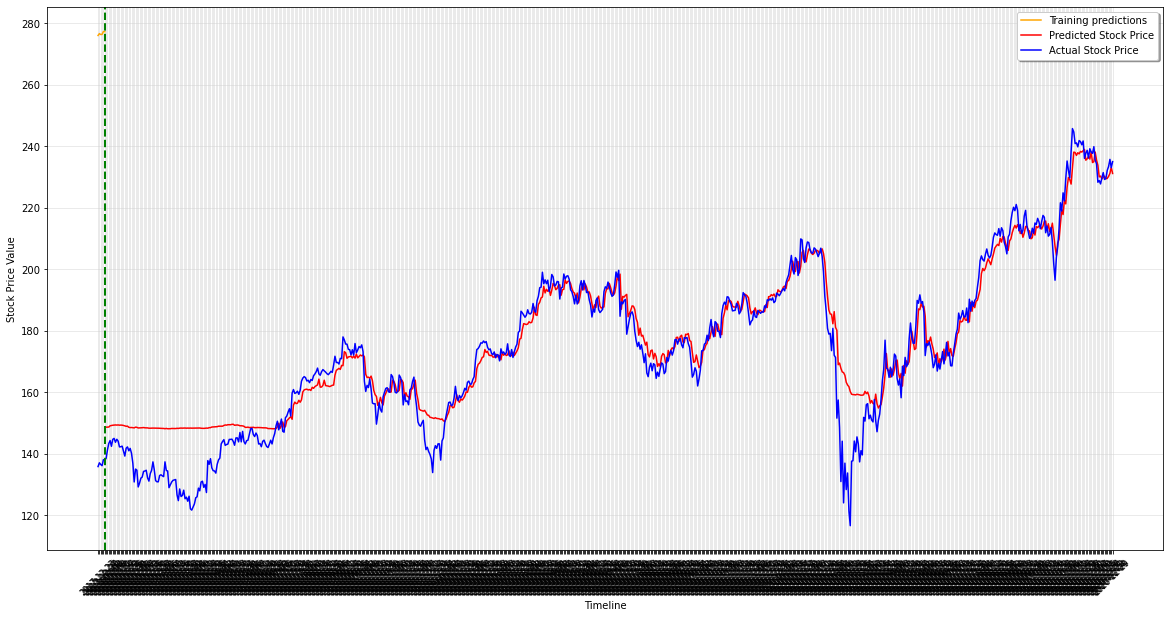

In [22]:
# Chage on attributes and no change on PricePerShare
# Reduced attributes
PRED_TRAIN = sc_predict.inverse_transform(clf2.predict(X_scaled_train))
PRED_FUTURE = sc_predict.inverse_transform(clf2.predict(X_scaled_test))
# Plot parameters
START_DATE_FOR_PLOTTING = '2017-12-22'
START_INDEX = dataNSC_train.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(dataNSC_train.index[START_INDEX:], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(dataNSC_test.index[:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(dataNSC.index[START_INDEX:], dataNSC['CloseNext'][START_INDEX:].values, color='b', label='Actual Stock Price')

plt.axvline(x = dataNSC_train.index[-1], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

#print("RMSE",mean_squared_error(dataNSC_train['CloseNext'], PRED_TRAIN, squared=False))

In [ ]:
START_INDEX = dataNSC_test.index.get_loc('2020-12-15')
START_INDEX

In [ ]:
PRED_FUTURE = sc_predict.inverse_transform(clf2.predict(X_scaled_test))

START_DATE_FOR_PLOTTING = '2020-12-15'
START_INDEX = dataNSC_test.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(dataNSC_test.index[:], PRED_FUTURE[:], color='red', label='Predicted Stock Price')
#plt.plot(dataNSC_test.index[:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(dataNSC.index[START_INDEX:], dataNSC['CloseNext'][START_INDEX:].values, color='b', label='Actual Stock Price')

#plt.axvline(x = dataNSC_test.index[-1], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

#print("RMSE",mean_squared_error(dataNSC_train['CloseNext'], PRED_TRAIN, squared=False))